In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

# Em clima de Copa do Mundo, vamos praticar Análise de Dados com o dataset contendo diversas informações sobre todas as partidas da Copa.

Gere gráficos para tentar responder as seguintes perguntas:

    1. Quais são os maiores ganhadores da Copa do Mundo?

    2. Quais são as seleções que mais participaram de edições da Copa do Mundo?

    3. Quais são as seleções que mais jogaram na Copa do Mundo?

    4. Quais são as seleções com as maiores quantidades de gols feitos?

    5. Qual é o retrospecto do Brasil na Copa? (Vitória, Empate e Derrota)

    6. Quais foram as partidas com a maior quantidade de gols?

    7. Como a média de espectadores mudou com o passar das edições?

    8. Quais estádios tiveram a maior quantidade de espectadores?

Além das perguntas já estabelecidas neste exercício, aproveite para também gerar novas análises que o grupo acredite ser pertinente ao problema. :)


In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/mdrs-thiago/uerj-topicos-a/main/datasets/WorldCupMatches.csv')

In [4]:
df.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA




*   **Year:** Qual o ano da partida dessa copa;
*   **Datetime:** Qual o momento da partida dessa copa (dia/mês/ano);
*   **Stage:** Etapa em que a partida se encontrava (Ex: Chave de grupos, Oitavas de final, Quartas de final etc);
*   **Stadium:** Estádio onde a partida foi disputada;
*   **City:** Cidade onde a partida foi disputada;
*   **Home Team Name:** Nome do time da casa (Uma forma de se diferenciar os times que participaram na partida);
*   **Home Team Goals:** Gols marcados pelo time da casa;
*   **Away Team Goals:** Gols marcados pelo time de fora;
*   **Away Team Name:** Nome do time de fora (Uma forma de se diferenciar os times que participaram na partida);
*   **Win conditions:** Tendo a partida empatada no tempo regular (90 minutos), qual o resultado;
*   **Attendance:** Número de pessoas que assistiram a partida no estádio;
*   **Half-time Home Goals:** Gols marcados, nos primeiros 45 minutos de partida, pelo time da casa;
*   **Half-time Away Goals:** Gols marcados, nos primeiros 45 minutos de partida, pelo time de fora;
*   **Referee:** Nome do Arbitro (Juíz) que apitou a partida;
*   **Assistant 1:** Nome do 1º bandeirinha que auxiliou o juíz;
*   **Assistant 2:** Nome do 2º bandeirinha que auxiliou o juíz;
*   **RoundID:** Identificação de cada etapa da copa (se relaciona com a coluna Stage);
*   **MatchID:** Identificação individual das partidas da copa;
*   **Home Team Initials:** Iniciais do time da casa;
*   **Away Team Initials:** Iniciais do time de fora.


In [5]:
df.drop_duplicates(inplace= True)
df.dropna(inplace= True)
df = df.replace({"Germany FR": "Germany"}, regex = True)

In [6]:
pd.concat([df[df['Win conditions'] == ' win on penalties (5 - 4) '], df[df['Win conditions'] == ' win on penalties (2 - 3) '],
df[df['Win conditions'] == ' win on penalties (3 - 4) '], df[df['Win conditions'] == ' win on penalties (4 - 3) '],
df[df['Win conditions'] == 'Win on Golden Goal ']])

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
357,1982.0,08 Jul 1982 - 21:00,Semi-finals,Ramon Sanchez Pizjuan,Seville,Germany,3.0,3.0,France,win on penalties (5 - 4),70000.0,0.0,0.0,CORVER Charles (NED),GALLER Bruno (SUI),VALENTINE Robert (SCO),295.0,914.0,FRG,FRA
456,1990.0,30 Jun 1990 - 17:00,Quarter-finals,Comunale,Florence,Yugoslavia,0.0,0.0,Argentina,win on penalties (2 - 3),38971.0,0.0,0.0,ROETHLISBERGER Kurt (SUI),JOUINI Neji (TUN),HANSAL Mohamed (ALG),751.0,31.0,YUG,ARG
460,1990.0,03 Jul 1990 - 20:00,Semi-finals,San Paolo,Naples,Italy,1.0,1.0,Argentina,win on penalties (3 - 4),59978.0,0.0,0.0,VAUTROT Michel (FRA),LISTKIEWICZ Michal (POL),MIKKELSEN Peter (DEN),3464.0,28.0,ITA,ARG
461,1990.0,04 Jul 1990 - 20:00,Semi-finals,Stadio delle Alpi,Turin,Germany,1.0,1.0,England,win on penalties (4 - 3),62628.0,0.0,0.0,RAMIZ WRIGHT Jose (BRA),QUINIOU Joel (FRA),PEREZ HOYOS Armando (COL),3464.0,159.0,FRG,ENG
631,2002.0,16 Jun 2002 - 15:30,Round of 16,Oita Stadium Big Eye,Oita,Sweden,1.0,2.0,Senegal,Win on Golden Goal,39747.0,0.0,0.0,AQUINO Ubaldo (PAR),GIACOMUZZI Miguel (PAR),VERGARA Hector (CAN),43950200.0,43950051.0,SWE,SEN
635,2002.0,18 Jun 2002 - 20:30,Round of 16,Daejeon World Cup Stadium,Daejeon,Korea Republic,2.0,1.0,Italy,Win on Golden Goal,38588.0,0.0,0.0,MORENO Byron (ECU),RATTALINO Jorge (ARG),SZEKELY Ferenc (HUN),43950200.0,43950056.0,KOR,ITA
638,2002.0,22 Jun 2002 - 20:30,Quarter-finals,Osaka Nagai Stadium,Osaka,Senegal,0.0,1.0,Turkey,Win on Golden Goal,44233.0,0.0,0.0,RUIZ Oscar (COL),RATTALINO Jorge (ARG),GIACOMUZZI Miguel (PAR),43950300.0,43950060.0,SEN,TUR


## 1. Quais são os maiores ganhadores da Copa do Mundo?

In [7]:
df[df.Stage == 'Final'].head(10)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
17,1930.0,30 Jul 1930 - 14:15,Final,Estadio Centenario,Montevideo,Uruguay,4.0,2.0,Argentina,,68346.0,1.0,2.0,LANGENUS Jean (BEL),SAUCEDO Ulises (BOL),CRISTOPHE Henry (BEL),405.0,1087.0,URU,ARG
34,1934.0,10 Jun 1934 - 17:30,Final,Nazionale PNF,Rome,Italy,2.0,1.0,Czechoslovakia,Italy win after extra time,55000.0,0.0,0.0,EKLIND Ivan (SWE),BAERT Louis (BEL),IVANCSICS Mihaly (HUN),3490.0,1134.0,ITA,TCH
52,1938.0,19 Jun 1938 - 17:00,Final,Stade Olympique,Colombes,Italy,4.0,2.0,Hungary,,45000.0,3.0,1.0,CAPDEVILLE Georges (FRA),WUETHRICH Hans (SUI),KRIST Gustav (TCH),3487.0,1174.0,ITA,HUN
100,1954.0,04 Jul 1954 - 17:00,Final,Wankdorf Stadium,Berne,Germany,3.0,2.0,Hungary,,62500.0,2.0,2.0,LING William (ENG),ORLANDINI Vincenzo (ITA),GRIFFITHS Benjamin (WAL),3484.0,1278.0,FRG,HUN
135,1958.0,29 Jun 1958 - 15:00,Final,Rasunda Stadium,Solna,Brazil,5.0,2.0,Sweden,,49737.0,2.0,1.0,GUIGUE Maurice (FRA),DUSCH Albert (GER),GARDEAZABAL Juan (ESP),3482.0,1343.0,BRA,SWE
167,1962.0,17 Jun 1962 - 14:30,Final,Nacional,Santiago De Chile,Brazil,3.0,1.0,Czechoslovakia,,68679.0,1.0,1.0,LATYCHEV Nikolaj (URS),HORN Leo (NED),DAVIDSON Bob (SCO),3480.0,1463.0,BRA,TCH
199,1966.0,30 Jul 1966 - 15:00,Final,Wembley Stadium,London,England,4.0,2.0,Germany,England win after extra time,96924.0,0.0,0.0,DIENST Gottfried (SUI),BAKHRAMOV Tofik (URS),GALBA Karol (TCH),3478.0,1633.0,ENG,FRG
231,1970.0,21 Jun 1970 - 12:00,Final,Estadio Azteca,Mexico City,Brazil,4.0,1.0,Italy,,107412.0,1.0,1.0,GLOECKNER Rudolf (GDR),SCHEURER Ruedi (SUI),COEREZZA Norberto Angel (ARG),3476.0,1765.0,BRA,ITA
269,1974.0,07 July 1974 - 16:00,Final,Olympiastadion,Munich,Netherlands,1.0,2.0,Germany,,78200.0,1.0,2.0,TAYLOR John (ENG),GONZALEZ ARCHUNDIA Alfonso (MEX),BARRETO RUIZ Ramon (URU),605.0,2063.0,NED,FRG
307,1978.0,25 Jun 1978 - 15:00,Final,El Monumental - Estadio Monumental Antonio Ves...,Buenos Aires,Argentina,3.0,1.0,Netherlands,Argentina win after extra time,71483.0,0.0,0.0,GONELLA Sergio (ITA),BARRETO RUIZ Ramon (URU),LINEMAYR Erich (AUT),639.0,2198.0,ARG,NED


In [8]:
winners = []
for row, data in df[df.Stage == 'Final'].iterrows():
    if data['Home Team Goals'] > data['Away Team Goals']:
        winners.append(data['Home Team Name'])
    elif data['Home Team Goals'] == data['Away Team Goals']:
        vencedor = data['Win conditions'].split(' ')[0]
        winners.append(vencedor)
    else:
        winners.append(data['Away Team Name'])

In [9]:
vencedores = pd.Series(winners)
vencedores.value_counts()

Brazil       5
Italy        4
Germany      4
Argentina    2
Uruguay      1
England      1
France       1
Spain        1
dtype: int64

<BarContainer object of 8 artists>

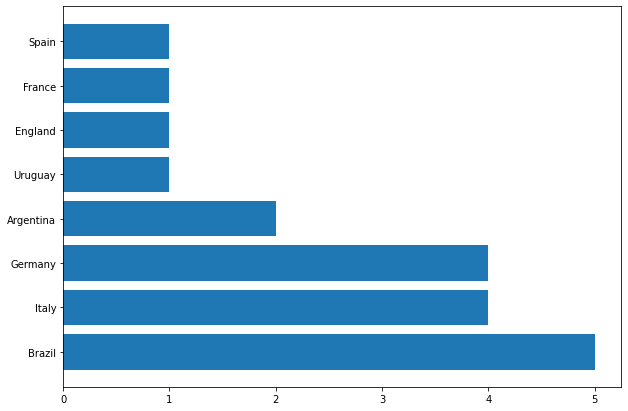

In [10]:
vencedores_totais = vencedores.value_counts()
plt.figure(figsize=(10,7))
plt.barh(vencedores_totais.index, vencedores_totais)
#plt.xticks(rotation=90);

## 2. Quais são as seleções que mais participaram de edições da Copa do Mundo?

In [11]:
participacao = df.groupby('Year').agg({"Away Team Name": "unique", "Home Team Name": "unique"})
participacao.head(4)

,Away Team Name,Home Team Name
Year,,
1930.0,"[Mexico, Belgium, Brazil, Peru, France, Bolivi...","[France, USA, Yugoslavia, Romania, Argentina, ..."
1934.0,"[France, Egypt, Netherlands, Argentina, Belgiu...","[Austria, Hungary, Switzerland, Sweden, German..."
1938.0,"[Germany, Dutch East Indies, Belgium, Romania,...","[Switzerland, Hungary, France, Cuba, Italy, Br..."
1950.0,"[Mexico, Chile, USA, Italy, Switzerland, Parag...","[Brazil, England, Spain, Sweden, Yugoslavia, U..."


In [12]:
times_casa = []
times_fora = []
for ano in list(df['Year'].dropna().unique()):
  times_casa += list(participacao.get("Home Team Name")[ano])
  for x in range(len(list(participacao.get("Away Team Name")[ano]))):
      if list(participacao.get("Away Team Name")[ano])[x] not in list(participacao.get("Home Team Name")[ano]):
        times_fora.append(list(participacao.get("Away Team Name")[ano])[x])

In [13]:
todos_times = times_fora + times_casa
df_times = pd.Series(todos_times)

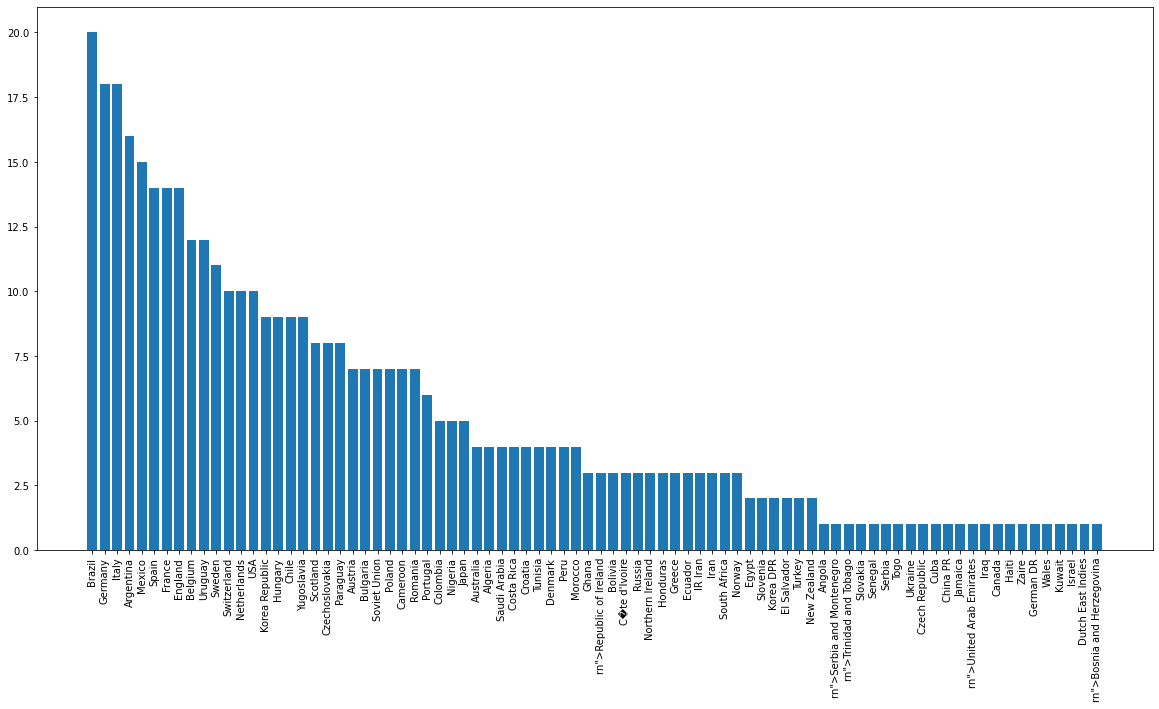

In [14]:
df_times_contados = df_times.value_counts()
plt.figure(figsize=(20,10))
plt.bar(df_times_contados.index, df_times_contados)
plt.xticks(rotation=90);

## 3. Quais são as seleções que mais jogaram na Copa do Mundo?

In [15]:
times_mais_partidas = pd.Series(list(df["Home Team Name"]) + list(df["Away Team Name"]))
times_mais_partidas.value_counts()

Germany              105
Brazil               104
Italy                 83
Argentina             77
England               62
                    ... 
Zaire                  3
Haiti                  3
Canada                 3
Kuwait                 3
Dutch East Indies      1
Length: 82, dtype: int64

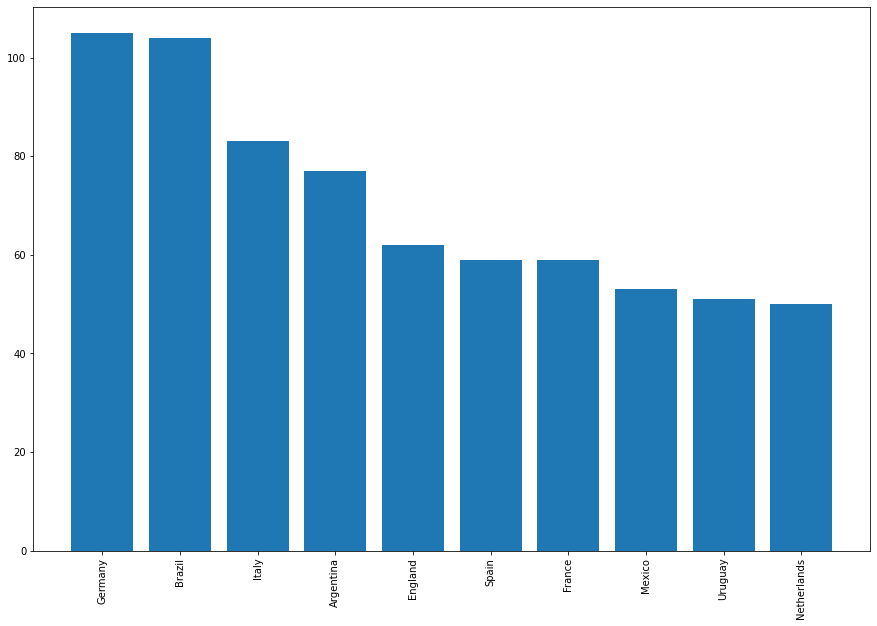

In [16]:
times_mais_partidas_contados = times_mais_partidas.value_counts().head(10)
plt.figure(figsize=(15,10))
plt.bar(times_mais_partidas_contados.index, times_mais_partidas_contados)
plt.xticks(rotation=90);

## 4. Quais são as seleções com as maiores quantidades de gols feitos?

In [17]:
gols_fora = df.groupby('Away Team Name')["Away Team Goals"].sum()
gols_casa = df.groupby('Home Team Name')["Home Team Goals"].sum()

gols_totais = {}
for pais in gols_casa.index:
  gols_totais[pais] = gols_fora[pais] + gols_casa[pais]

times_gols_total = pd.Series(gols_totais).sort_values(ascending = False)

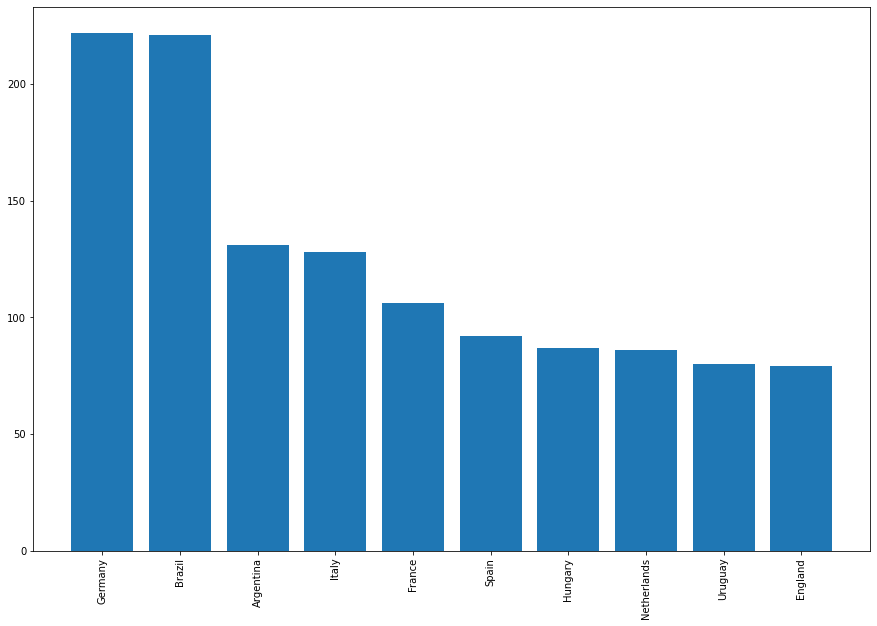

In [18]:
times_gols_total.head(10)
plt.figure(figsize=(15,10))
plt.bar(times_gols_total.head(10).index, times_gols_total.head(10))
plt.xticks(rotation=90);

## 5. Qual é o retrospecto do Brasil na Copa? (Vitória, Empate e Derrota)

In [19]:
df_brasil = pd.concat([df[df["Home Team Name"]=="Brazil"], df[df["Away Team Name"]=="Brazil"]])
df_brasil['Victor'] = 'Nan'

In [20]:
df_brasil

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,...,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,Victor
11,1930.0,20 Jul 1930 - 13:00,Group 2,Estadio Centenario,Montevideo,Brazil,4.0,0.0,Bolivia,,...,1.0,0.0,BALWAY Thomas (FRA),MATEUCCI Francisco (URU),VALLEJO Gaspar (MEX),201.0,1091.0,BRA,BOL,Nan
40,1938.0,05 Jun 1938 - 17:30,First round,Stade de la Meinau,Strasbourg,Brazil,6.0,5.0,Poland,Brazil win after extra time,...,0.0,0.0,EKLIND Ivan (SWE),POISSANT Louis (FRA),KISSENBERGER Ernest (FRA),206.0,1150.0,BRA,POL,Nan
44,1938.0,12 Jun 1938 - 17:00,Quarter-finals,Stade du Parc Lescure,Bordeaux,Brazil,1.0,1.0,Czechoslovakia,,...,0.0,0.0,VON HERTZKA Pal (HUN),SCARPI Giuseppe (ITA),DE LA SALLE Charles (FRA),429.0,1152.0,BRA,TCH,Nan
48,1938.0,14 Jun 1938 - 18:00,Quarter-finals,Stade du Parc Lescure,Bordeaux,Brazil,2.0,1.0,Czechoslovakia,,...,0.0,1.0,CAPDEVILLE Georges (FRA),MARENCO Paul (FRA),KISSENBERGER Ernest (FRA),429.0,1153.0,BRA,TCH,Nan
51,1938.0,19 Jun 1938 - 17:00,Match for third place,Stade du Parc Lescure,Bordeaux,Brazil,4.0,2.0,Sweden,,...,1.0,2.0,LANGENUS Jean (BEL),OLIVE D. (FRA),VALPREDE Ferdinand (FRA),3488.0,1151.0,BRA,SWE,Nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643,2002.0,30 Jun 2002 - 20:00,Final,International Stadium Yokohama,Yokohama,Germany,0.0,2.0,Brazil,,...,0.0,0.0,COLLINA Pierluigi (ITA),LINDBERG Leif (SWE),SHARP Philip (ENG),43950600.0,43950064.0,GER,BRA,Nan
686,2006.0,22 Jun 2006 - 21:00,Group F,"FIFA World Cup Stadium, Dortmund",Dortmund,Japan,1.0,4.0,Brazil,,...,1.0,1.0,POULAT Eric (FRA),DAGORNE Lionel (FRA),TEXIER Vincent (FRA),97410100.0,97410043.0,JPN,BRA,Nan
752,2010.0,25 Jun 2010 - 16:00,Group G,Durban Stadium,Durban,Portugal,0.0,0.0,Brazil,,...,0.0,0.0,ARCHUNDIA Benito (MEX),VERGARA Hector (CAN),TORRENTERA Marvin (MEX),249722.0,300111111.0,POR,BRA,Nan
764,2010.0,02 Jul 2010 - 16:00,Quarter-finals,Port Elizabeth Stadium,Nelson Mandela Bay/Port Elizabeth,Netherlands,2.0,1.0,Brazil,,...,0.0,1.0,NISHIMURA Yuichi (JPN),SAGARA Toru (JPN),JEONG Hae Sang (KOR),249718.0,300061507.0,NED,BRA,Nan


In [21]:
#paises = list(set(list(df["Away Team Name"]) + list(df["Away Team Name"])))
lista = []
for row, data in df_brasil.iterrows():
    if data["Home Team Goals"] > data["Away Team Goals"]:
        lista.append(data["Home Team Initials"])
    elif data["Home Team Goals"] == data["Away Team Goals"]:
        if data["Win conditions"] == " ":
            lista.append("Draw") 
        else:
            lista.append("Draw")    
    elif data["Home Team Goals"] < data["Away Team Goals"]:
        lista.append(data["Away Team Initials"])
    else:
        lista.append("Erro")

In [22]:
df_brasil['Victor'] = lista
df_brasil

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,...,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,Victor
11,1930.0,20 Jul 1930 - 13:00,Group 2,Estadio Centenario,Montevideo,Brazil,4.0,0.0,Bolivia,,...,1.0,0.0,BALWAY Thomas (FRA),MATEUCCI Francisco (URU),VALLEJO Gaspar (MEX),201.0,1091.0,BRA,BOL,BRA
40,1938.0,05 Jun 1938 - 17:30,First round,Stade de la Meinau,Strasbourg,Brazil,6.0,5.0,Poland,Brazil win after extra time,...,0.0,0.0,EKLIND Ivan (SWE),POISSANT Louis (FRA),KISSENBERGER Ernest (FRA),206.0,1150.0,BRA,POL,BRA
44,1938.0,12 Jun 1938 - 17:00,Quarter-finals,Stade du Parc Lescure,Bordeaux,Brazil,1.0,1.0,Czechoslovakia,,...,0.0,0.0,VON HERTZKA Pal (HUN),SCARPI Giuseppe (ITA),DE LA SALLE Charles (FRA),429.0,1152.0,BRA,TCH,Draw
48,1938.0,14 Jun 1938 - 18:00,Quarter-finals,Stade du Parc Lescure,Bordeaux,Brazil,2.0,1.0,Czechoslovakia,,...,0.0,1.0,CAPDEVILLE Georges (FRA),MARENCO Paul (FRA),KISSENBERGER Ernest (FRA),429.0,1153.0,BRA,TCH,BRA
51,1938.0,19 Jun 1938 - 17:00,Match for third place,Stade du Parc Lescure,Bordeaux,Brazil,4.0,2.0,Sweden,,...,1.0,2.0,LANGENUS Jean (BEL),OLIVE D. (FRA),VALPREDE Ferdinand (FRA),3488.0,1151.0,BRA,SWE,BRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643,2002.0,30 Jun 2002 - 20:00,Final,International Stadium Yokohama,Yokohama,Germany,0.0,2.0,Brazil,,...,0.0,0.0,COLLINA Pierluigi (ITA),LINDBERG Leif (SWE),SHARP Philip (ENG),43950600.0,43950064.0,GER,BRA,BRA
686,2006.0,22 Jun 2006 - 21:00,Group F,"FIFA World Cup Stadium, Dortmund",Dortmund,Japan,1.0,4.0,Brazil,,...,1.0,1.0,POULAT Eric (FRA),DAGORNE Lionel (FRA),TEXIER Vincent (FRA),97410100.0,97410043.0,JPN,BRA,BRA
752,2010.0,25 Jun 2010 - 16:00,Group G,Durban Stadium,Durban,Portugal,0.0,0.0,Brazil,,...,0.0,0.0,ARCHUNDIA Benito (MEX),VERGARA Hector (CAN),TORRENTERA Marvin (MEX),249722.0,300111111.0,POR,BRA,Draw
764,2010.0,02 Jul 2010 - 16:00,Quarter-finals,Port Elizabeth Stadium,Nelson Mandela Bay/Port Elizabeth,Netherlands,2.0,1.0,Brazil,,...,0.0,1.0,NISHIMURA Yuichi (JPN),SAGARA Toru (JPN),JEONG Hae Sang (KOR),249718.0,300061507.0,NED,BRA,NED


In [23]:
df_brasil["Result"] = df_brasil["Victor"].mask(df_brasil['Victor'] == 'BRA', "Vitoria")

In [24]:
cond = [df_brasil["Victor"]=="BRA", df_brasil["Victor"]=="Draw"]
opera = ["Vitoria", "Empate"]
df_brasil["Result"] = np.select(cond, opera, "Derrota")

In [25]:
df_brasil["Result"].value_counts()

Vitoria    70
Empate     17
Derrota    17
Name: Result, dtype: int64

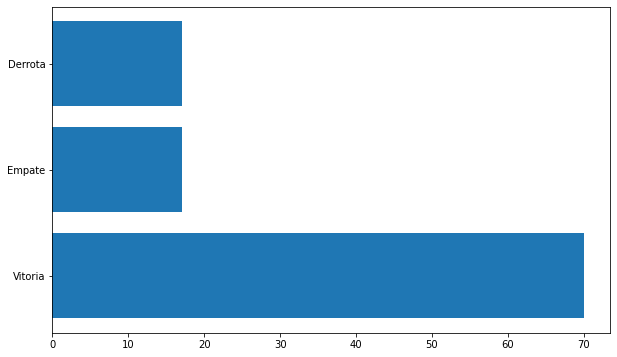

In [26]:
resultado_brasil = df_brasil["Result"].value_counts()
plt.figure(figsize=(10,6))
plt.barh(resultado_brasil.index, resultado_brasil);

## 6. Quais foram as partidas com a maior quantidade de gols?

In [27]:
df["Total Goals"] = df['Home Team Goals'] + df['Away Team Goals']

In [42]:
df.sort_values(by = ["Total Goals"], ascending = False).head(10)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,...,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,Total Goals
94,1954.0,26 Jun 1954 - 17:00,Quarter-finals,La Pontaise,Lausanne,Austria,7.0,5.0,Switzerland,,...,5.0,4.0,FAULTLESS Charlie (SCO),ASENSI Manuel (ESP),SCHMETZER Emil (FRG),212.0,1237.0,AUT,SUI,12.0
40,1938.0,05 Jun 1938 - 17:30,First round,Stade de la Meinau,Strasbourg,Brazil,6.0,5.0,Poland,Brazil win after extra time,...,0.0,0.0,EKLIND Ivan (SWE),POISSANT Louis (FRA),KISSENBERGER Ernest (FRA),206.0,1150.0,BRA,POL,11.0
87,1954.0,20 Jun 1954 - 16:50,Group 2,St. Jakob,Basel,Hungary,8.0,3.0,Germany,,...,3.0,1.0,LING William (ENG),SCHICKER Werner (SUI),GRIFFITHS Benjamin (WAL),211.0,1277.0,HUN,FRG,11.0
312,1982.0,15 Jun 1982 - 21:00,Group 3,Nuevo Estadio,Elche,Hungary,10.0,1.0,El Salvador,,...,3.0,0.0,AL DOY Ebrahim (BHR),CORVER Charles (NED),LUND-SORENSEN Henning (DEN),293.0,896.0,HUN,SLV,11.0
105,1958.0,08 Jun 1958 - 19:00,Group 2,Idrottsparken,Norrk�Ping,France,7.0,3.0,Paraguay,,...,2.0,2.0,GARDEAZABAL Juan (ESP),GRIFFITHS Benjamin (WAL),BROZZI Juan (ARG),220.0,1386.0,FRA,PAR,10.0
91,1954.0,23 Jun 1954 - 18:00,Group 2,Hardturm,Zurich,Germany,7.0,2.0,Turkey,,...,3.0,1.0,VINCENTI Raymond (FRA),FAULTLESS Charlie (SCO),DOERFLINGER Ernst (SUI),211.0,1284.0,FRG,TUR,9.0
243,1974.0,18 Jun 1974 - 19:30,Group 2,Parkstadion,Gelsenkirchen,Yugoslavia,9.0,0.0,Zaire,,...,6.0,0.0,DELGADO Omar (COL),LLOBREGAT Vicente (VEN),BARRETO RUIZ Ramon (URU),262.0,2186.0,YUG,ZAI,9.0
10,1930.0,19 Jul 1930 - 15:00,Group 1,Estadio Centenario,Montevideo,Argentina,6.0,3.0,Mexico,,...,3.0,1.0,SAUCEDO Ulises (BOL),ALONSO Gualberto (URU),RADULESCU Constantin (ROU),201.0,1086.0,ARG,MEX,9.0
134,1958.0,28 Jun 1958 - 17:00,Match for third place,Nya Ullevi,Gothenburg,France,6.0,3.0,Germany,,...,3.0,1.0,BROZZI Juan (ARG),ELLIS Arthur (ENG),LUNDELL Bengt (SWE),3483.0,1382.0,FRA,FRG,9.0
80,1954.0,17 Jun 1954 - 18:00,Group 2,Hardturm,Zurich,Hungary,9.0,0.0,Korea Republic,,...,4.0,0.0,VINCENTI Raymond (FRA),VON GUNTER Albert (SUI),STEINER Carl (AUT),211.0,1294.0,HUN,KOR,9.0


## 7. Como a média de espectadores mudou com o passar das edições?

In [51]:
df.groupby(['Year'])['Attendance'].sum()

Year
1930.0     590549.0
1934.0     363000.0
1938.0     375700.0
1950.0    1045246.0
1954.0     768607.0
1958.0     819810.0
1962.0     893172.0
1966.0    1563135.0
1970.0    1603975.0
1974.0    1865753.0
1978.0    1545791.0
1982.0    2109723.0
1986.0    2394031.0
1990.0    2516215.0
1994.0    3587538.0
1998.0    2785100.0
2002.0    2705197.0
2006.0    3359439.0
2010.0    3178856.0
2014.0    3386810.0
Name: Attendance, dtype: float64

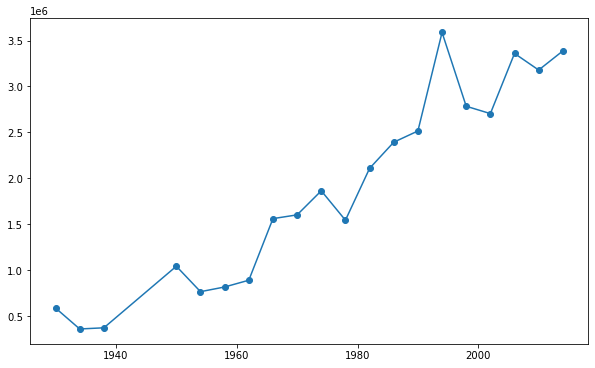

In [55]:
publico = df.groupby(['Year'])['Attendance'].sum()
plt.figure(figsize=(10,6))
plt.plot(publico.index, publico)
plt.scatter(publico.index, publico);

## 8. Quais estádios tiveram a maior quantidade de espectadores?

In [83]:
publico_estadio = df.groupby(['Stadium'])['Attendance'].sum()

In [95]:
df.groupby(['Stadium'], as_index=False)['Attendance'].sum().sort_values(by = ['Attendance'], ascending = False).reset_index(drop = True)

,Stadium,Attendance
0,Estadio Azteca,1917550.0
1,Olympiastadion,815300.0
2,Maracan� - Est�dio Jornalista M�rio Filho,813541.0
3,Wembley Stadium,778034.0
4,Rose Bowl,740807.0
...,...,...
176,Velodrome Municipale,9000.0
177,Littorio,9000.0
178,Ilha do Retiro,8501.0
179,Fort Carree,7000.0


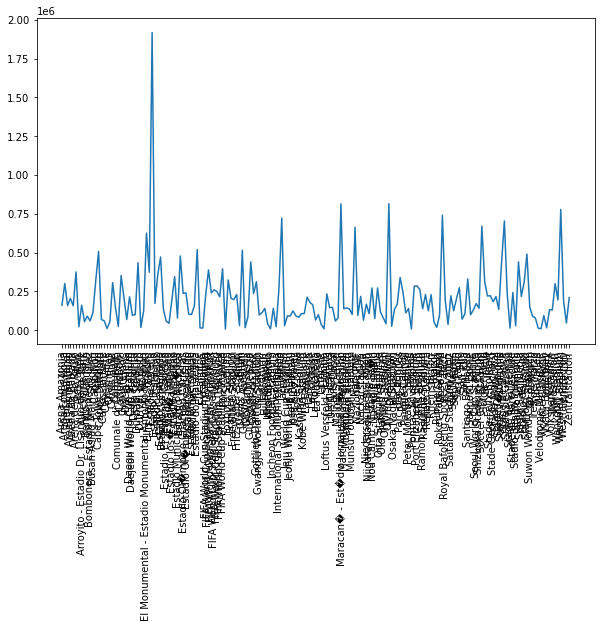

In [98]:
publico_estadio = df.groupby(['Stadium'])['Attendance'].sum()
plt.figure(figsize=(10,6))
plt.plot(publico_estadio.index, publico_estadio)
plt.xticks(rotation=90);